In [1]:
import os

import joblib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn import set_config
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier, plot_importance

from src.config import CATEGORICAL_COLUMNS, NUMERICAL_COLUMNS, LABEL_COLUMN
from src.utils import plot_metric_curves
from src.transformer import preprocessor

set_config(display='diagram')   

# Load Dataset

In [2]:
train = pd.read_csv('../data/users_train.csv')
test = pd.read_csv('../data/users_test.csv')

x_train, y_train = train.drop(columns=[LABEL_COLUMN]), train[LABEL_COLUMN]
x_test, y_test = test.drop(columns=[LABEL_COLUMN]), test[LABEL_COLUMN]

scale_pos_weight = 1/y_train.mean()

# Modeling

## Only numeric features
### Model

In [12]:
xgb_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor(categical=False)),
        (
            "xgb_model",
            XGBClassifier(
                scale_pos_weight=scale_pos_weight,
                use_label_encoder=False,
                eval_metric="logloss",
            ),
        ),
    ]
)
xgb_model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('numeric_features',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['cnt_user_engagement',
                                                   'cnt_level_start_quickplay',
                                                   'cnt_level_end_quickplay',
                                                   'cnt_level_complete_quickplay',
                                                   'cnt_level_reset_quickplay',
                                                   'cnt_post_scor...
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=4.328717639975918, subsample=1,
                               tree_method='exact', use_label_encoder=False,
                               validate_parameters=1, verbosity=None))])

### Evaluation

              precision    recall  f1-score   support

           0       0.86      0.65      0.74       614
           1       0.36      0.64      0.46       185

    accuracy                           0.65       799
   macro avg       0.61      0.65      0.60       799
weighted avg       0.74      0.65      0.67       799



None

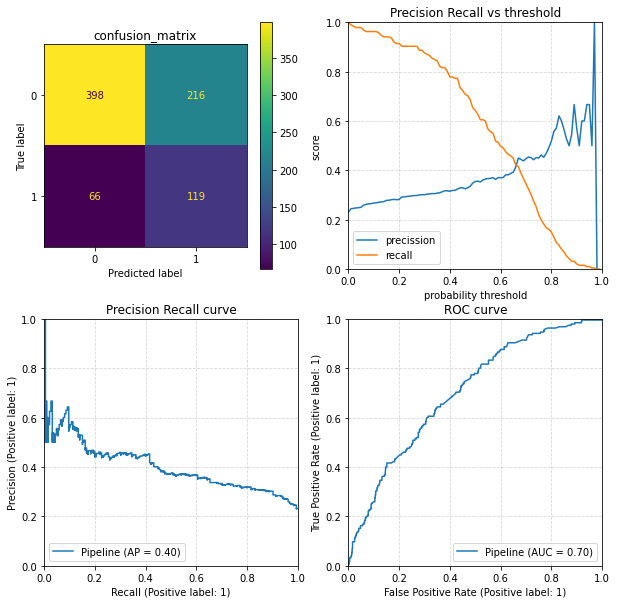

In [6]:
x = x_test
y = y_test

y_pred = xgb_model.predict(x)
display(print(metrics.classification_report(y, y_pred)))
ax = plot_metric_curves(xgb_model, x, y)

## Numerical and Categorical features


### Modeling

In [14]:
xgb_model_full = Pipeline(
    steps=[
        ("preprocessor", preprocessor()),
        (
            "xgb_model",
            XGBClassifier(
                scale_pos_weight=scale_pos_weight,
                use_label_encoder=False,
                eval_metric='logloss',
            ),
        ),
    ]
)
xgb_model_full.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('numeric_features',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['cnt_user_engagement',
                                                   'cnt_level_start_quickplay',
                                                   'cnt_level_end_quickplay',
                                                   'cnt_level_complete_quickplay',
                                                   'cnt_level_reset_quickplay',
                                                   'cnt_post_scor...
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=4.328717639975918, subsample=1,
                               tree_method='exact', use_label_encoder=False,
                               validate_parameters=1, verbosity=None))])

### Evaluation

              precision    recall  f1-score   support

           0       0.87      0.63      0.73       614
           1       0.36      0.69      0.47       185

    accuracy                           0.64       799
   macro avg       0.61      0.66      0.60       799
weighted avg       0.75      0.64      0.67       799



None

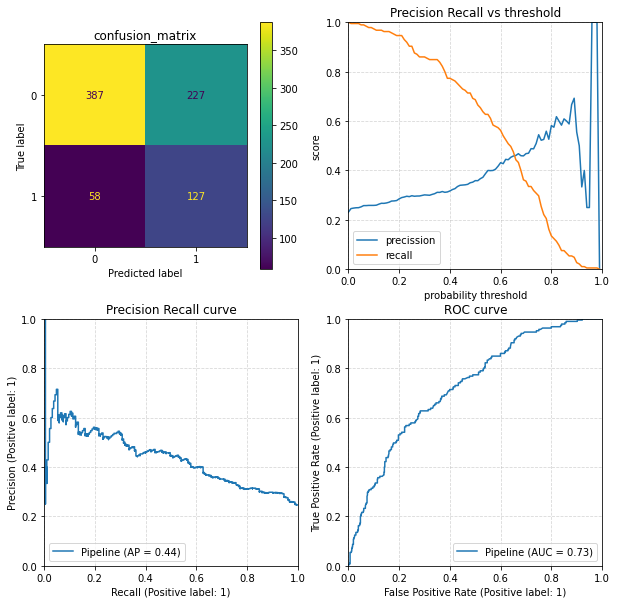

In [16]:
x = x_test
y = y_test

y_pred = xgb_model_full.predict(x)
display(print(metrics.classification_report(y, y_pred)))
ax = plot_metric_curves(xgb_model_full, x, y)

## Save model 

In [10]:
model_path = 'models'
if not os.path.exists(model_path):
    os.makedirs(model_path)

joblib.dump(xgb_model_full, f'{model_path}/xgb_model_full.job')

['models/xgb_model_full.job']